In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("C:/Users/user/titanic.csv")
print (df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_1=df.drop('Cabin',axis=1)
df_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [6]:
df_data=df_1.dropna()
df_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
df_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
S=df_data['Pclass']
S.value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Pclass count')

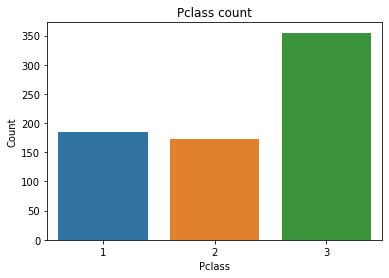

In [9]:
sns.countplot(data=df_data, x="Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass count")

In [143]:
S=df_data['Survived']
S.value_counts()

0    424
1    288
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived or Not')

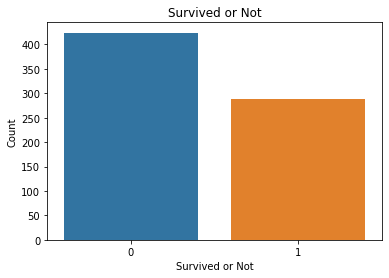

In [84]:
sns.countplot(data = df_data, x="Survived")
plt.xlabel("Survived or Not")
plt.ylabel("Count")
plt.title("Survived or Not")

In [12]:
df_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [13]:
df_data = df_data.replace({'male':0, 'female':1})

In [14]:
df_data = df_data.astype({'Sex' : 'int64'})

In [115]:
df_data = df_data.astype({'Age' : 'int64'})

In [116]:
df_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

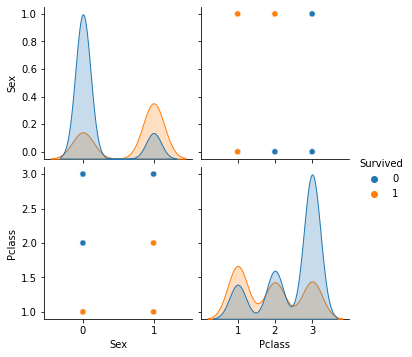

In [16]:
sns.pairplot(df_data,
             vars=['Sex', 'Pclass'],
            hue ='Survived')
plt.show()

Text(0.5, 1.0, 'Survived per Pclass')

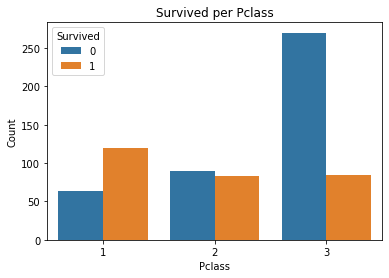

In [17]:
sns.countplot(data=df_data, x="Pclass", hue="Survived")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Survived per Pclass")

Text(0.5, 1.0, 'Survived per Sex')

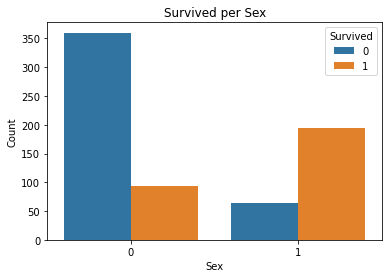

In [95]:
sns.countplot(data=df_data, x="Sex", hue="Survived")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survived per Sex")

Text(0.5, 1.0, 'Pclass per Sex')

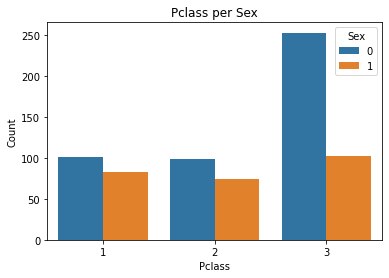

In [19]:
sns.countplot(data=df_data, x="Pclass", hue="Sex")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Pclass per Sex")

Text(0.5, 1.0, 'Survived per Age')

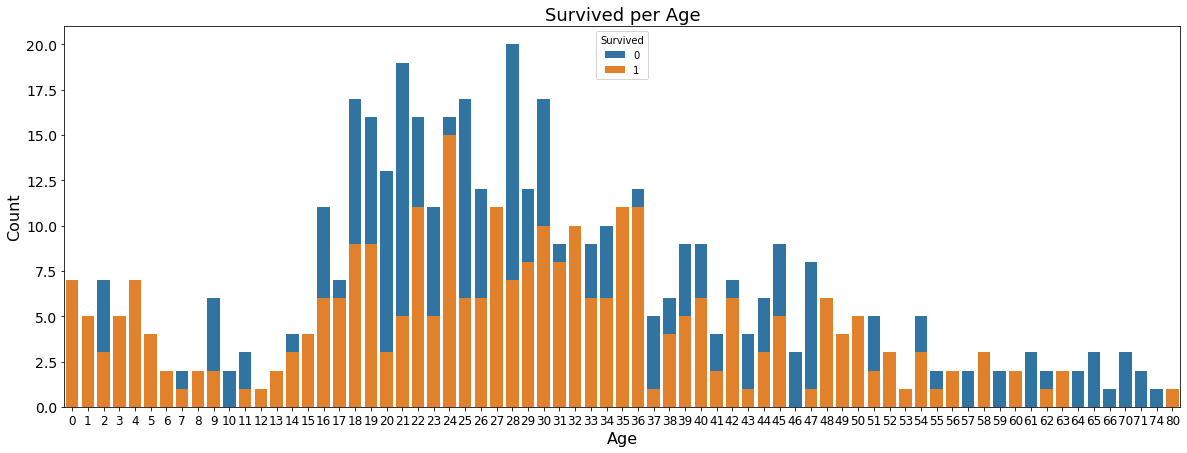

In [148]:
plt.figure(figsize=(20,7))
sns.countplot(data=df_data, x="Age", hue="Survived", dodge = False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Survived per Age", fontsize=18)

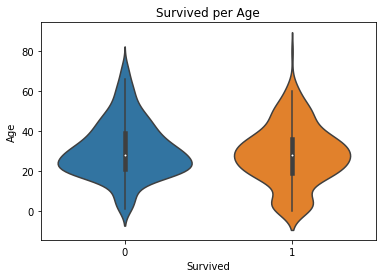

In [152]:
sns.violinplot(y="Age", x="Survived", data=df_data)
plt.title("Survived per Age")
plt.show()

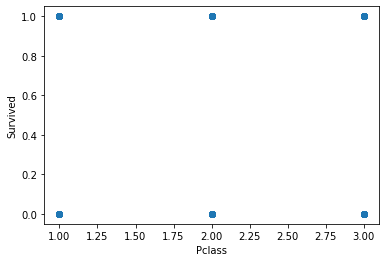

In [147]:
plt.scatter(df_data['Pclass'], df_data['Survived'])
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

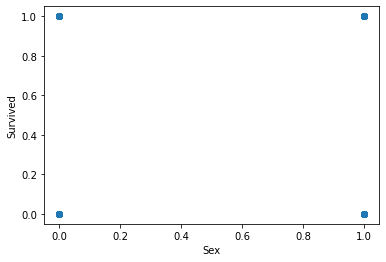

In [105]:
plt.scatter(df_data['Sex'], df_data['Survived'])
plt.xlabel('Sex')
plt.ylabel('Survived')

plt.show()

In [22]:
#Y=df_data['Survived']

In [23]:
Y=df_data[['Survived']]
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [24]:
X=df_data.drop(['Survived', 'Name', 'Ticket'], axis=1)
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,S
1,2,1,1,38.0,1,0,71.2833,C
2,3,3,1,26.0,0,0,7.9250,S
3,4,1,1,35.0,1,0,53.1000,S
4,5,3,0,35.0,0,0,8.0500,S


In [25]:
E=df_data['Embarked']
E.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [26]:
X = X.replace({'S':0, 'C':1, 'Q':2})
#S=0, C=1, Q=2

In [27]:
X = X.astype({'Embarked' : 'int64'})

In [88]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,3,0,35.0,0,0,8.0500,0


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=5)

In [74]:
print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape : (534, 8)
y_train.shape : (534, 1)
X_test.shape: (178, 8)
y_test.shape: (178, 1)


In [75]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.6910112359550562
[[114   0]
 [ 55   9]]


In [76]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8033707865168539
[[99 15]
 [20 44]]


In [77]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7584269662921348
[[86 28]
 [15 49]]


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.8426966292134831
[[103  11]
 [ 17  47]]


In [79]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.7921348314606742
[[100  14]
 [ 23  41]]


In [80]:
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=4)

In [81]:
model.score(X_test, y_test.values.ravel())

0.6573033707865169

In [82]:
a = model.score(X_test, y_test)
a

0.6573033707865169

In [83]:
for n in range(3, 178):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X_train, y_train.values.ravel())
    score = model.score(X_test, y_test)
    if score > a:
        print(n)
        a = score
        max = n
model.n_neighbors = max
model.fit(X_train, y_train.values.ravel())
max_S = model.score(X_test, y_test)
print("정확도가 가장 높은 최근접 이웃 개수는 정확도가 %.9f%%인 %d 입니다."%(max_S*100, max))

6
12
14
18
22
24
29
정확도가 가장 높은 최근접 이웃 개수는 정확도가 72.471910112%인 29 입니다.
